In [47]:
import tensorflow as tf
import numpy as np
print(tf.__version__, np.__version__)

1.8.0 1.14.0


In [48]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Label: 6


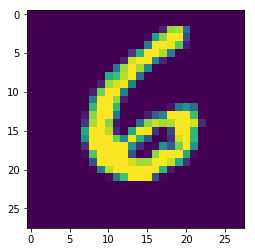

In [49]:
#visualize the data
import random
import matplotlib.pyplot as plt

i= random.randint(0, 100)

print("Label: %s" % train_labels[i])
plt.imshow(train_images[i])

In [50]:
#understand the data format

print(train_images.shape)
print(test_images.shape)
print(train_images)

(60000, 28, 28)
(10000, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [51]:
#Reformat the images
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

#print(type(TEST_SIZE))
#reshape from (N, 28,28) to (N,784)

train_images = np.reshape(train_images,(TRAINING_SIZE, 784))
test_images  = np.reshape(test_images,(TEST_SIZE, 784))
print(train_images.shape,test_images.shape)
print(train_images[0], test_images[0])

#convert the array to float32 as oppesed to unit8
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

#convert the pixel values from interger between 0 to 255 to float
train_images/=255   # as grayscale is falled in betweeen 0 t0 255
test_images/=255    #normalization is done only to lie the value in between 0 and 1 ie. 3d to 3d

#print(train_images)
#print(test_images)

(60000, 784) (10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 

In [52]:
#Checking the labels after and before the Normalization of any of these.
#Make the class(class0, class1, class2, class3, ........., class9)
NUM_DIGITS = 10
print("Before", train_labels[0]) # The format of the labels before conversion
train_labels  = tf.keras.utils.to_categorical(train_labels, NUM_DIGITS)
print("After", train_labels[0]) # The format of the labels after conversion
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_DIGITS)


Before 5
After [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [53]:
#Creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [54]:
# We will now compile and print out a summary of our model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [55]:
#Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 17s 275us/step - loss: 0.1987 - acc: 0.9416
Epoch 2/5
60000/60000 [==============================] - 15s 258us/step - loss: 0.0899 - acc: 0.9744
Epoch 3/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.0659 - acc: 0.9816
Epoch 4/5
60000/60000 [==============================] - 17s 277us/step - loss: 0.0503 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 17s 275us/step - loss: 0.0408 - acc: 0.9890


In [56]:
#Test the model
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy: %.4f' % (accuracy))

10000/10000 [==============================] - 1s 71us/step
Test accuracy: 0.9790
